In [1]:
!pip install ultralytics Pillow
!pip install supervision

In [2]:
from PIL import Image
import os

def renamer(name:str="\\dud", t:int=9, target_size=(300, 300)):
    i = 100 * t
    target_place = 'Data\\' + str(t)

    for dirname, _, filenames in os.walk('Data_source' + name):
        for filename in filenames:
            img = Image.open(os.path.join(dirname, filename))
            img = img.resize(target_size)
            img.save(f"{target_place}\\{i}.png")
            i += 1
            print(dirname[-6:], filename, os.path.join(dirname, filename))

In [3]:
renamer()

ce\dud 1000x620.webp Data_source\dud\1000x620.webp
ce\dud 1011.jpg Data_source\dud\1011.jpg
ce\dud 1082048317279.7792.webp Data_source\dud\1082048317279.7792.webp
ce\dud 1091229085686.7686.webp Data_source\dud\1091229085686.7686.webp
ce\dud 11163955t1h1344.jpg Data_source\dud\11163955t1h1344.jpg
ce\dud 1161339_600.jpg Data_source\dud\1161339_600.jpg
ce\dud 1402143055683.3523.png Data_source\dud\1402143055683.3523.png
ce\dud 1515509916-videobloger-yuriy-dud-vzyal-intervyu-u-samogo-sebya-1.webp Data_source\dud\1515509916-videobloger-yuriy-dud-vzyal-intervyu-u-samogo-sebya-1.webp
ce\dud 1536908812_1536908801_00032.jpg Data_source\dud\1536908812_1536908801_00032.jpg
ce\dud 1551957057.jpg Data_source\dud\1551957057.jpg
ce\dud 16cbbe285de13b9065dfb26011537d28.png Data_source\dud\16cbbe285de13b9065dfb26011537d28.png
ce\dud 1737500151284315754_5851c317_1280x720.jpg Data_source\dud\1737500151284315754_5851c317_1280x720.jpg
ce\dud 18273fe.jpg Data_source\dud\18273fe.jpg
ce\dud 1_1105130.jpg Data

In [4]:
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections, BoxAnnotator
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# download model
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")

# load model
model = YOLO(model_path)

# load image
image_path = "Data\\7\\753.png"
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

# inference
results = model(image_np)
detections = Detections.from_ultralytics(results[0])

for box, conf, class_id in zip(detections.xyxy, detections.confidence, detections.class_id):
    print({
        "x1": float(box[0]),
        "y1": float(box[1]),
        "x2": float(box[2]),
        "y2": float(box[3]),
        "confidence": float(conf),
        "class_id": int(class_id)
    })
    image = image.crop(box)
    image.save("test.png")



0: 640x640 1 FACE, 64.5ms
Speed: 13.0ms preprocess, 64.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
{'x1': 74.23904418945312, 'y1': 20.64112091064453, 'x2': 177.61204528808594, 'y2': 189.42825317382812, 'confidence': 0.8490131497383118, 'class_id': 0}


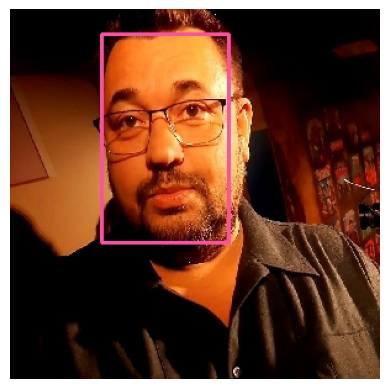

In [5]:

# annotate
annotator = BoxAnnotator()
annotated_frame = annotator.annotate(scene=image_np.copy(), detections=detections)

# display
plt.imshow(annotated_frame)
plt.axis("off")
plt.show()

In [6]:
#import math
from datasets import Dataset

celebrities = {'0':'Sergey Semyonovich Sobyanin', '1':'Khabib Abdulmanapovich Nurmagomedov', '2':'Timur Ildarovich Yunusov', '3':'Sergey Vladimirovich Shnurov', '4':'Vasiliy Mikhaylovich Vakulenko', '5':'Philipp Bedros Kirkorov', '6':'Ivan Andreyevich Urgant', '7':'Sergey Yevgenevich Zhukov', '8':'Aleksandr Vladimirovich Revva', '9':'Yury Aleksandrovich Dud'}
def crop_image(img_path, ds:Dataset=0, target_size=(300, 300)):
    img = Image.open(img_path).convert("RGB")
    img_np = np.array(img)
    results = model(img_np)
    detections = Detections.from_ultralytics(results[0])
    img_path = img_path.split("\\")
    img.save(f"celebrities\{(int(img_path[-1][:-4]) + 1):04}_source.png")
    for box, conf, class_id in zip(detections.xyxy, detections.confidence, detections.class_id):
        img = img.crop(box)
        img = img.resize(target_size)
        
        img.save(f"celebrities\{(int(img_path[-1][:-4]) + 1):04}_crop.png")
        item = {"image_source": f"celebrities\{(int(img_path[-1][:-4]) + 1):04}_source.png", "image_crop": f"celebrities\{(int(img_path[-1][:-4]) + 1):04}_crop.png", "label": celebrities[img_path[-2]]}
        return item

In [7]:
crop_image(image_path)


0: 640x640 1 FACE, 46.9ms
Speed: 3.9ms preprocess, 46.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


{'image_source': 'celebrities\\0754_source.png',
 'image_crop': 'celebrities\\0754_crop.png',
 'label': 'Sergey Yevgenevich Zhukov'}

In [8]:
import os

rows = []
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames:
        print(dirname[-6:] + f'\\{filename}')
        rows += [crop_image(dirname[-6:] + f'\\{filename}', celebrities)]

Data\0\0.png

0: 640x640 1 FACE, 45.4ms
Speed: 3.3ms preprocess, 45.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Data\0\1.png

0: 640x640 1 FACE, 41.1ms
Speed: 3.7ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Data\0\10.png

0: 640x640 1 FACE, 46.1ms
Speed: 3.3ms preprocess, 46.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Data\0\11.png

0: 640x640 1 FACE, 41.8ms
Speed: 3.1ms preprocess, 41.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Data\0\12.png

0: 640x640 1 FACE, 46.4ms
Speed: 3.9ms preprocess, 46.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Data\0\13.png

0: 640x640 1 FACE, 40.7ms
Speed: 2.6ms preprocess, 40.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Data\0\14.png

0: 640x640 1 FACE, 45.1ms
Speed: 2.6ms preprocess, 45.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Data\0\15.png

0: 640x640 1 FACE, 42

In [9]:
rows[0]

{'image_source': 'celebrities\\0001_source.png',
 'image_crop': 'celebrities\\0001_crop.png',
 'label': 'Sergey Semyonovich Sobyanin'}

In [10]:
image_source, image_crop, label = [], [], []
for i in rows:
    if i != None:
        image_source += [i["image_source"]]
        image_crop += [i["image_crop"]]
        label += [i["label"]]


In [11]:
print(len(image_source), len(image_crop), len(label))

1000 1000 1000


In [12]:
!pip install -U "huggingface_hub[cli]"
!pip install datasets[vision]

In [13]:
#hf auth login

формат {'image_source': 'celebrities\\0001_source.png',
 'image_crop': 'celebrities\\0001_crop.png',
 'label': 'Sergey Semyonovich Sobyanin'}

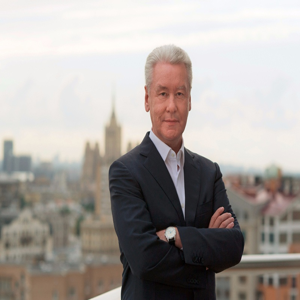

In [14]:
import datasets

celebrities = datasets.Dataset.from_dict({
    "image_source": image_source, 
    "image_crop": image_crop, 
    "label": label
    }).cast_column("image_source", datasets.Image()).cast_column("image_crop", datasets.Image())
celebrities.info.dataset_name = "celebrities"
celebrities[0]['image_source']

In [15]:
celebrities.push_to_hub("Phoolore/celebrities")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/datasets/Phoolore/celebrities/commit/250213f435dde9537be325c3905568260da02fd5', commit_message='Upload dataset', commit_description='', oid='250213f435dde9537be325c3905568260da02fd5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Phoolore/celebrities', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Phoolore/celebrities'), pr_revision=None, pr_num=None)

перекладываем датасет в zip

In [16]:
!pip install onnxruntime plotly nbformat

In [17]:
!curl -L "https://huggingface.co/garavv/arcface-onnx/resolve/main/arc.onnx?download=true" -o arcface.onnx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1303  100  1303    0     0   4720      0 --:--:-- --:--:-- --:--:--  4738

  4  130M    4 5968k    0     0  5178k      0  0:00:25  0:00:01  0:00:24 5178k
 14  130M   14 19.5M    0     0  9517k      0  0:00:14  0:00:02  0:00:12 14.4M
 25  130M   25 33.4M    0     0  10.8M      0  0:00:12  0:00:03  0:00:09 14.2M
 35  130M   35 45.8M    0     0  11.1M      0  0:00:11  0:00:04  0:00:07 13.5M
 46  130M   46 60.7M    0     0  11.9M      0  0:00:10  0:00:05  0:00:05 13.9M
 57  130M   57 75.0M    0     0  12.3M      0  0:00:10  0:00:06  0:00:04 14.0M
 68  130M   68 89.7M    0     0  12.6M      0  0:00:10  0:00:07  0:00:03 14.0M
 78  130M   78  102M    0     0  12.6M      0  0:0

In [18]:
import cv2
import numpy as np
import onnxruntime as ort

def preprocess(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (112, 112))
    img = (img.astype(np.float32) - 127.5) / 128.0
    return img[np.newaxis, ...]   # shape: (1, 112, 112, 3)

sess = ort.InferenceSession("arcface.onnx")
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

#emb1 = sess.run([output_name], {input_name: preprocess("face1.jpg")})[0][0]
#emb2 = sess.run([output_name], {input_name: preprocess("face2.jpg")})[0][0]
def arc(img_path):
    return sess.run([output_name], {input_name: preprocess(img_path)})[0][0]

In [19]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt

def make_plot(paths):
    umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
    images = []
    for img_path in paths:
        images += [arc(img_path)]
    embedding = umap_model.fit_transform(images)
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
    plt.title('UMAP Projection of Embeddings')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()


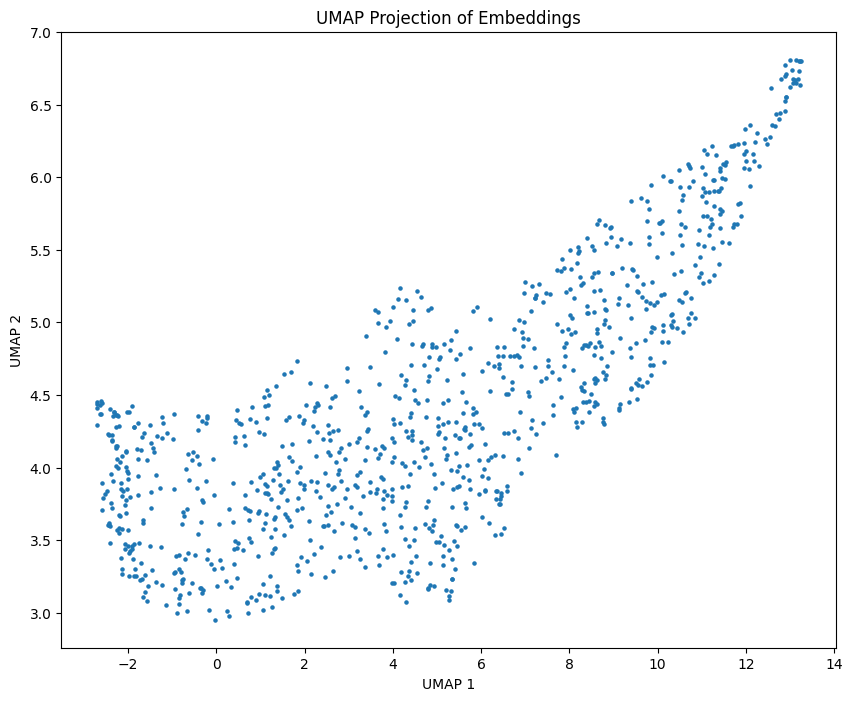

In [20]:
make_plot(image_source)

In [ ]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

def plotly_2d(paths, labels=0):
    images = []
    for img_path in paths:
        images += [arc(img_path)]
    # Assuming your embeddings are stored in a variable called 'your_embeddings'
    umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
    embedding = umap_model.fit_transform(images)

    # Assuming you have a list or array of labels corresponding to your embeddings
    #labels = np.array(labels)  # Modify as necessary

    # Create a DataFrame
    df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])
    df['Label'] = labels
    df['Path'] = paths

    fig = px.scatter(df, x='UMAP 1', y='UMAP 2', color='Label',
                    title='UMAP Projection of Embeddings',
                    labels={'UMAP 1': 'UMAP 1', 'UMAP 2': 'UMAP 2'},
                    hover_data=['Label', ])

    # Show the plot
    fig.show()


In [22]:
plotly_2d(image_source, label)

In [ ]:
def plotly_3d(paths, label):
    images = []
    for img_path in paths:
        images += [arc(img_path)]
    # Assuming your embeddings are stored in a variable called 'your_embeddings'
    umap_model = umap.UMAP(n_neighbors=15, n_components=3, random_state=42)
    embedding = umap_model.fit_transform(images)

    # Assuming you have a list or array of labels corresponding to your embeddings
    #labels = np.array(labels)  # Modify as necessary
    df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2', 'UMAP 3'])
    df['Label'] = label
    df['Path'] = paths
    fig = px.scatter_3d(df, x='UMAP 1', y='UMAP 2', z='UMAP 3', color='Label',
                    title='3D UMAP Projection of Embeddings',
                    labels={'UMAP 1': 'UMAP 1', 'UMAP 2': 'UMAP 2', 'UMAP 3': 'UMAP 3'},
                    hover_data=['Label', 'Path'])
    # Show the plot
    fig.show()


In [24]:
plotly_3d(image_source, label)

c:\Users\arsen\coding\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [27]:
plotly_2d(image_crop, label)

c:\Users\arsen\coding\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [28]:
plotly_3d(image_crop, label)

c:\Users\arsen\coding\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

